<a href="https://colab.research.google.com/github/RizwanMunawar/Cats-Vs-Dogs-Classification-CNN-Data-Augmentation/blob/master/Cats_vs_dogs_classification_using_data_augmentation_and_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### importación de librerias

In [1]:
import os
import time
import numpy as np
import distutils as _distutils
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Se establecen los directorios

In [2]:
path = './archive/split'
train_dir = './split_processed/train'
validation_dir = './split_processed/val'
test_dir = './split_processed/test'

In [3]:
# Rutas para cada clase en el dataset
train_Apple_Apple_scab_dir = './split_processed/train/Apple___Apple_scab'
train_Apple_Black_rot_dir = './split_processed/train/Apple___Black_rot'
train_Apple_Cedar_apple_rust_dir = './split_processed/train/Apple___Cedar_apple_rust'
train_Apple_healthy_dir = './split_processed/train/Apple___healthy'
train_Blueberry_healthy_dir = './split_processed/train/Blueberry___healthy'
train_Cherry_healthy_dir = './split_processed/train/Cherry_(including_sour)___healthy'
train_Cherry_Powdery_mildew_dir = './split_processed/train/Cherry_(including_sour)___Powdery_mildew'
train_Corn_Cercospora_leaf_spot_dir = './split_processed/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
train_Corn_Common_rust_dir = './split_processed/train/Corn_(maize)___Common_rust_'
train_Corn_healthy_dir = './split_processed/train/Corn_(maize)___healthy'
train_Corn_Northern_Leaf_Blight_dir = './split_processed/train/Corn_(maize)___Northern_Leaf_Blight'
train_Grape_Black_rot_dir = './split_processed/train/Grape___Black_rot'
train_Grape_Esca_Black_Measles_dir = './split_processed/train/Grape___Esca_(Black_Measles)'
train_Grape_healthy_dir = './split_processed/train/Grape___healthy'
train_Grape_Leaf_blight_dir = './split_processed/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
train_Orange_Haunglongbing_dir = './split_processed/train/Orange___Haunglongbing_(Citrus_greening)'
train_Peach_Bacterial_spot_dir = './split_processed/train/Peach___Bacterial_spot'
train_Peach_healthy_dir = './split_processed/train/Peach___healthy'
train_Pepper_bell_Bacterial_spot_dir = './split_processed/train/Pepper,_bell___Bacterial_spot'
train_Pepper_bell_healthy_dir = './split_processed/train/Pepper,_bell___healthy'
train_Potato_Early_blight_dir = './split_processed/train/Potato___Early_blight'
train_Potato_healthy_dir = './split_processed/train/Potato___healthy'
train_Potato_Late_blight_dir = './split_processed/train/Potato___Late_blight'
train_Raspberry_healthy_dir = './split_processed/train/Raspberry___healthy'
train_Soybean_healthy_dir = './split_processed/train/Soybean___healthy'
train_Squash_Powdery_mildew_dir = './split_processed/train/Squash___Powdery_mildew'
train_Strawberry_healthy_dir = './split_processed/train/Strawberry___healthy'
train_Strawberry_Leaf_scorch_dir = './split_processed/train/Strawberry___Leaf_scorch'
train_Tomato_Bacterial_spot_dir = './split_processed/train/Tomato___Bacterial_spot'
train_Tomato_Early_blight_dir = './split_processed/train/Tomato___Early_blight'
train_Tomato_healthy_dir = './split_processed/train/Tomato___healthy'
train_Tomato_Late_blight_dir = './split_processed/train/Tomato___Late_blight'
train_Tomato_Leaf_Mold_dir = './split_processed/train/Tomato___Leaf_Mold'
train_Tomato_Septoria_leaf_spot_dir = './split_processed/train/Tomato___Septoria_leaf_spot'
train_Tomato_Spider_mites_dir = './split_processed/train/Tomato___Spider_mites Two-spotted_spider_mite'
train_Tomato_Target_Spot_dir = './split_processed/train/Tomato___Target_Spot'
train_Tomato_Tomato_mosaic_virus_dir = './split_processed/train/Tomato___Tomato_mosaic_virus'
train_Tomato_Tomato_Yellow_Leaf_Curl_Virus_dir = './split_processed/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus'


# Rutas para cada clase en el dataset (test)
test_Apple_Apple_scab_dir = './split_processed/test/Apple___Apple_scab'
test_Apple_Black_rot_dir = './split_processed/test/Apple___Black_rot'
test_Apple_Cedar_apple_rust_dir = './split_processed/test/Apple___Cedar_apple_rust'
test_Apple_healthy_dir = './split_processed/test/Apple___healthy'
test_Blueberry_healthy_dir = './split_processed/test/Blueberry___healthy'
test_Cherry_healthy_dir = './split_processed/test/Cherry_(including_sour)___healthy'
test_Cherry_Powdery_mildew_dir = './split_processed/test/Cherry_(including_sour)___Powdery_mildew'
test_Corn_Cercospora_leaf_spot_dir = './split_processed/test/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
test_Corn_Common_rust_dir = './split_processed/test/Corn_(maize)___Common_rust_'
test_Corn_healthy_dir = './split_processed/test/Corn_(maize)___healthy'
test_Corn_Northern_Leaf_Blight_dir = './split_processed/test/Corn_(maize)___Northern_Leaf_Blight'
test_Grape_Black_rot_dir = './split_processed/test/Grape___Black_rot'
test_Grape_Esca_Black_Measles_dir = './split_processed/test/Grape___Esca_(Black_Measles)'
test_Grape_healthy_dir = './split_processed/test/Grape___healthy'
test_Grape_Leaf_blight_dir = './split_processed/test/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
test_Orange_Haunglongbing_dir = './split_processed/test/Orange___Haunglongbing_(Citrus_greening)'
test_Peach_Bacterial_spot_dir = './split_processed/test/Peach___Bacterial_spot'
test_Peach_healthy_dir = './split_processed/test/Peach___healthy'
test_Pepper_bell_Bacterial_spot_dir = './split_processed/test/Pepper,_bell___Bacterial_spot'
test_Pepper_bell_healthy_dir = './split_processed/test/Pepper,_bell___healthy'
test_Potato_Early_blight_dir = './split_processed/test/Potato___Early_blight'
test_Potato_healthy_dir = './split_processed/test/Potato___healthy'
test_Potato_Late_blight_dir = './split_processed/test/Potato___Late_blight'
test_Raspberry_healthy_dir = './split_processed/test/Raspberry___healthy'
test_Soybean_healthy_dir = './split_processed/test/Soybean___healthy'
test_Squash_Powdery_mildew_dir = './split_processed/test/Squash___Powdery_mildew'
test_Strawberry_healthy_dir = './split_processed/test/Strawberry___healthy'
test_Strawberry_Leaf_scorch_dir = './split_processed/test/Strawberry___Leaf_scorch'
test_Tomato_Bacterial_spot_dir = './split_processed/test/Tomato___Bacterial_spot'
test_Tomato_Early_blight_dir = './split_processed/test/Tomato___Early_blight'
test_Tomato_healthy_dir = './split_processed/test/Tomato___healthy'
test_Tomato_Late_blight_dir = './split_processed/test/Tomato___Late_blight'
test_Tomato_Leaf_Mold_dir = './split_processed/test/Tomato___Leaf_Mold'
test_Tomato_Septoria_leaf_spot_dir = './split_processed/test/Tomato___Septoria_leaf_spot'
test_Tomato_Spider_mites_dir = './split_processed/test/Tomato___Spider_mites Two-spotted_spider_mite'
test_Tomato_Target_Spot_dir = './split_processed/test/Tomato___Target_Spot'
test_Tomato_Tomato_mosaic_virus_dir = './split_processed/test/Tomato___Tomato_mosaic_virus'
test_Tomato_Tomato_Yellow_Leaf_Curl_Virus_dir = './split_processed/test/Tomato___Tomato_Yellow_Leaf_Curl_Virus'


# Rutas para cada clase en el dataset (val)
val_Apple_Apple_scab_dir = './split_processed/val/Apple___Apple_scab'
val_Apple_Black_rot_dir = './split_processed/val/Apple___Black_rot'
val_Apple_Cedar_apple_rust_dir = './split_processed/val/Apple___Cedar_apple_rust'
val_Apple_healthy_dir = './split_processed/val/Apple___healthy'
val_Blueberry_healthy_dir = './split_processed/val/Blueberry___healthy'
val_Cherry_healthy_dir = './split_processed/val/Cherry_(including_sour)___healthy'
val_Cherry_Powdery_mildew_dir = './split_processed/val/Cherry_(including_sour)___Powdery_mildew'
val_Corn_Cercospora_leaf_spot_dir = './split_processed/val/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
val_Corn_Common_rust_dir = './split_processed/val/Corn_(maize)___Common_rust_'
val_Corn_healthy_dir = './split_processed/val/Corn_(maize)___healthy'
val_Corn_Northern_Leaf_Blight_dir = './split_processed/val/Corn_(maize)___Northern_Leaf_Blight'
val_Grape_Black_rot_dir = './split_processed/val/Grape___Black_rot'
val_Grape_Esca_Black_Measles_dir = './split_processed/val/Grape___Esca_(Black_Measles)'
val_Grape_healthy_dir = './split_processed/val/Grape___healthy'
val_Grape_Leaf_blight_dir = './split_processed/val/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
val_Orange_Haunglongbing_dir = './split_processed/val/Orange___Haunglongbing_(Citrus_greening)'
val_Peach_Bacterial_spot_dir = './split_processed/val/Peach___Bacterial_spot'
val_Peach_healthy_dir = './split_processed/val/Peach___healthy'
val_Pepper_bell_Bacterial_spot_dir = './split_processed/val/Pepper,_bell___Bacterial_spot'
val_Pepper_bell_healthy_dir = './split_processed/val/Pepper,_bell___healthy'
val_Potato_Early_blight_dir = './split_processed/val/Potato___Early_blight'
val_Potato_healthy_dir = './split_processed/val/Potato___healthy'
val_Potato_Late_blight_dir = './split_processed/val/Potato___Late_blight'
val_Raspberry_healthy_dir = './split_processed/val/Raspberry___healthy'
val_Soybean_healthy_dir = './split_processed/val/Soybean___healthy'
val_Squash_Powdery_mildew_dir = './split_processed/val/Squash___Powdery_mildew'
val_Strawberry_healthy_dir = './split_processed/val/Strawberry___healthy'
val_Strawberry_Leaf_scorch_dir = './split_processed/val/Strawberry___Leaf_scorch'
val_Tomato_Bacterial_spot_dir = './split_processed/val/Tomato___Bacterial_spot'
val_Tomato_Early_blight_dir = './split_processed/val/Tomato___Early_blight'
val_Tomato_healthy_dir = './split_processed/val/Tomato___healthy'
val_Tomato_Late_blight_dir = './split_processed/val/Tomato___Late_blight'
val_Tomato_Leaf_Mold_dir = './split_processed/val/Tomato___Leaf_Mold'
val_Tomato_Septoria_leaf_spot_dir = './split_processed/val/Tomato___Septoria_leaf_spot'
val_Tomato_Spider_mites_dir = './split_processed/val/Tomato___Spider_mites Two-spotted_spider_mite'
val_Tomato_Target_Spot_dir = './split_processed/val/Tomato___Target_Spot'
val_Tomato_Tomato_mosaic_virus_dir = './split_processed/val/Tomato___Tomato_mosaic_virus'
val_Tomato_Tomato_Yellow_Leaf_Curl_Virus_dir = './split_processed/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus'


In [4]:
# Inicializar contadores
num_train_images = {}
num_val_images = {}
num_test_images = {}

# Obtener la cantidad de imágenes por clase para train
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        num_train_images[class_name] = len(os.listdir(class_path))

# Obtener la cantidad de imágenes por clase para val
for class_name in os.listdir(validation_dir):
    class_path = os.path.join(validation_dir, class_name)
    if os.path.isdir(class_path):
        num_val_images[class_name] = len(os.listdir(class_path))

# Obtener la cantidad de imágenes por clase para test
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        num_test_images[class_name] = len(os.listdir(class_path))

# Mostrar resultados
print("Cantidad de imágenes por clase en train:", num_train_images)
print("Cantidad de imágenes por clase en val:", num_val_images)
print("Cantidad de imágenes por clase en test:", num_test_images)

Cantidad de imágenes por clase en train: {'Apple___Apple_scab': 510, 'Apple___Black_rot': 502, 'Apple___Cedar_apple_rust': 222, 'Apple___healthy': 1332, 'Blueberry___healthy': 1215, 'Cherry_(including_sour)___healthy': 691, 'Cherry_(including_sour)___Powdery_mildew': 851, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 414, 'Corn_(maize)___Common_rust_': 964, 'Corn_(maize)___healthy': 940, 'Corn_(maize)___Northern_Leaf_Blight': 797, 'Grape___Black_rot': 955, 'Grape___Esca_(Black_Measles)': 1119, 'Grape___healthy': 342, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 871, 'Orange___Haunglongbing_(Citrus_greening)': 4460, 'Peach___Bacterial_spot': 1860, 'Peach___healthy': 291, 'Pepper,_bell___Bacterial_spot': 807, 'Pepper,_bell___healthy': 1197, 'Potato___Early_blight': 810, 'Potato___healthy': 122, 'Potato___Late_blight': 810, 'Raspberry___healthy': 299, 'Soybean___healthy': 4122, 'Squash___Powdery_mildew': 1485, 'Strawberry___healthy': 369, 'Strawberry___Leaf_scorch': 898, 'Tomato_

In [5]:
# Sumar todas las imágenes en el conjunto de entrenamiento
total_train = sum(num_train_images.values())

# Sumar todas las imágenes en el conjunto de validación
total_validation = sum(num_val_images.values())

# Sumar todas las imágenes en el conjunto de prueba
total_test = sum(num_test_images.values())

# Mostrar resultados
print("Total de imágenes en train:", total_train)
print("Total de imágenes en validation:", total_validation)
print("Total de imágenes en test:", total_test)

Total de imágenes en train: 43955
Total de imágenes en validation: 4902
Total de imágenes en test: 5448


###### Defining Batch-size and image_shape for deep learning model

In [6]:
BATCH_SIZE = 100
IMG_SHAPE  = 150

###### Function for plotting images

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

##### Applying Data Agumentation

In [8]:
image_gen_train = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,
                                     zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 43955 images belonging to 38 classes.


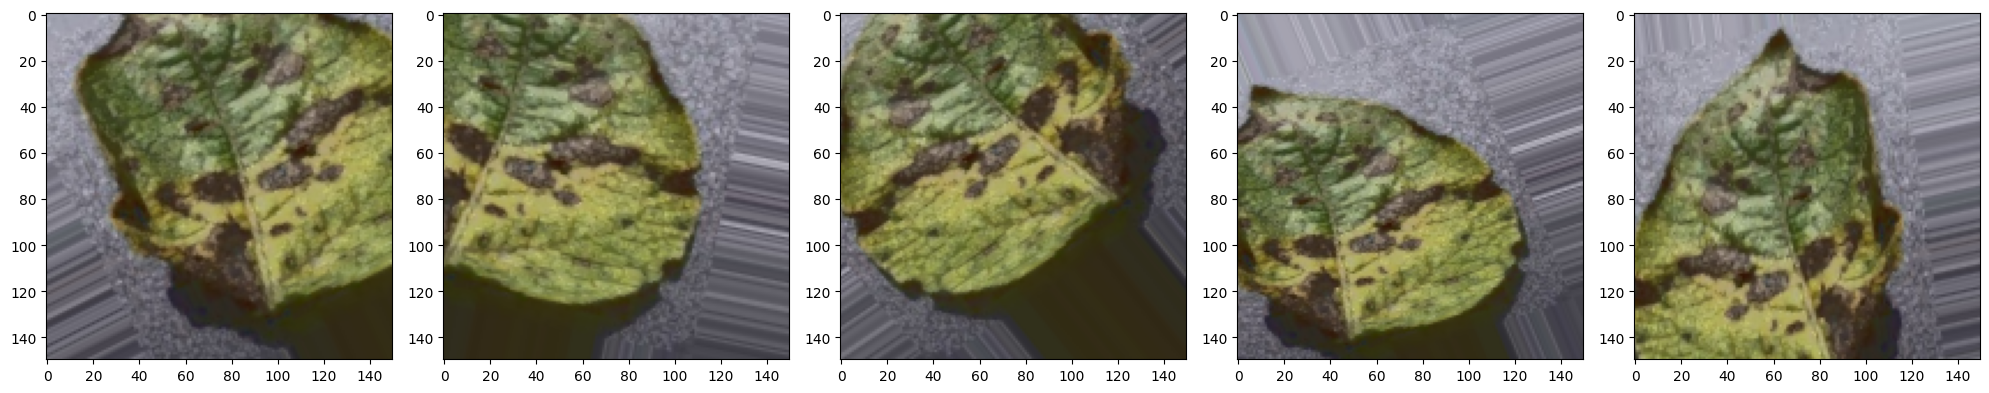

In [9]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

###### Pre-Processing for testing and validation data

In [10]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

image_gen_test = ImageDataGenerator(rescale=1./255)

test_data_gen = image_gen_test.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=test_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 4902 images belonging to 38 classes.
Found 5448 images belonging to 38 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),  # Define la entrada explícitamente
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(38, activation='softmax')  # Asegúrate de usar softmax para salida multicategoría
])


##### Defining Model Parameters

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Cambiado a False
    metrics=['accuracy']
)


###### Checking Model parameters details

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,472,102 (13.25 MB)

 Trainable params: 3,472,102 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

###### Let's Start Training

In [14]:
epochs=38
history = model.fit(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train / BATCH_SIZE)),
    epochs=epochs,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_validation / BATCH_SIZE)),
    verbose= 1
)


c:\Users\Angel\Desktop\Proyecto Olmos\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/38
440/440 ━━━━━━━━━━━━━━━━━━━━ 841s 2s/step - accuracy: 0.2070 - loss: 2.9613 - val_accuracy: 0.5771 - val_loss: 1.4198
Epoch 2/38
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/38


C:\Users\Angel\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


440/440 ━━━━━━━━━━━━━━━━━━━━ 1143s 3s/step - accuracy: 0.5724 - loss: 1.4118 - val_accuracy: 0.7075 - val_loss: 0.9551
Epoch 4/38
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 57us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/38
440/440 ━━━━━━━━━━━━━━━━━━━━ 1690s 4s/step - accuracy: 0.7021 - loss: 0.9518 - val_accuracy: 0.7815 - val_loss: 0.6864
Epoch 6/38
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 18us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/38
440/440 ━━━━━━━━━━━━━━━━━━━━ 404s 918ms/step - accuracy: 0.7691 - loss: 0.7347 - val_accuracy: 0.8080 - val_loss: 0.5860
Epoch 8/38
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 36us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/38
440/440 ━━━━━━━━━━━━━━━━━━━━ 597s 1s/step - accuracy: 0.8069 - loss: 0.5975 - val_accuracy: 0.8733 - val_loss: 0.4046
Epoch 10/38
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/38
440/440 ━━━━━━━━━━━━━━━━━━━━ 1172s 3s/step - accuracy: 0.8268 - loss: 0.5315 - val_accuracy: 0.8945

###### Visualization of validation-Training (Accuracy and Loss)

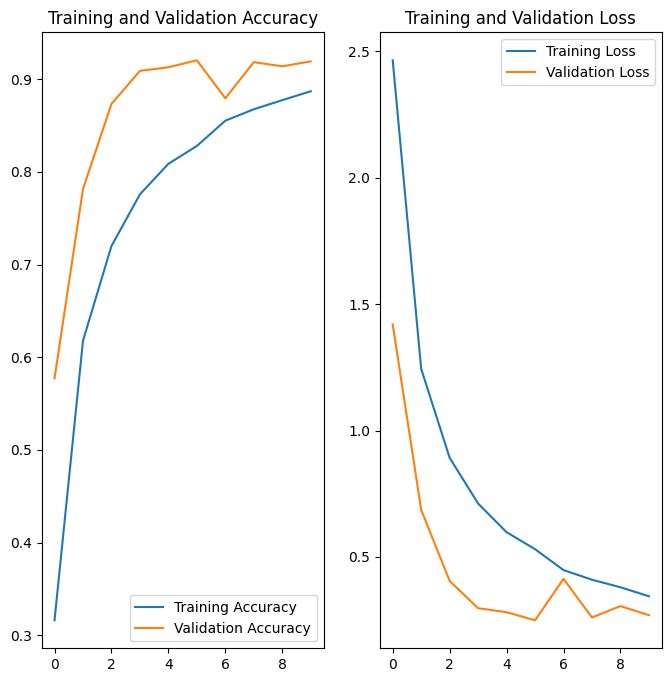

In [15]:
# Obtener las métricas de entrenamiento y validación
acc = history.history['accuracy']
val_acc = history.history.get('val_accuracy', [])
loss = history.history['loss']
val_loss = history.history.get('val_loss', [])

# Filtrar épocas con valores válidos
valid_indices = [i for i in range(len(acc)) if acc[i] != 0.0 and (i < len(val_acc) and val_acc[i] != 0.0)]
acc = [acc[i] for i in valid_indices]
val_acc = [val_acc[i] for i in valid_indices] if val_acc else []
loss = [loss[i] for i in valid_indices]
val_loss = [val_loss[i] for i in valid_indices] if val_loss else []

# Ajustar el rango de épocas válidas
epochs_range = range(len(acc))

# Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
if val_acc:
	plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
if val_loss:
	plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()



###### Testing model

In [16]:
results = model.evaluate(test_data_gen)
print("test_loss, test accuracy",results)

55/55 ━━━━━━━━━━━━━━━━━━━━ 39s 719ms/step - accuracy: 0.9179 - loss: 0.2777
test_loss, test accuracy [0.2926599979400635, 0.9153817892074585]


###### Saving model

In [17]:
#t = time.time()
#export_path_keras = "./{}.h5".format(int(t))
#print(export_path_keras)
#model.save(export_path_keras)
model.save('Results.h5')